In [1]:
#!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [3]:
# Preprocessing

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

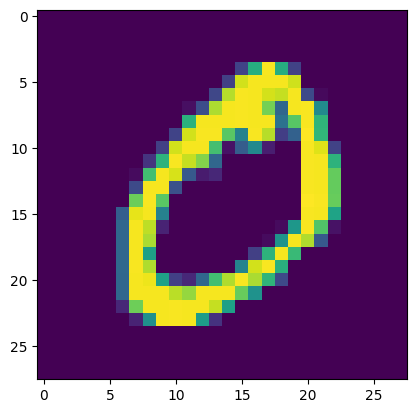

In [6]:
plt.imshow(X_train[1])

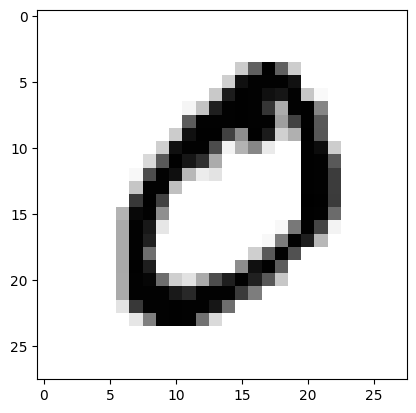

In [7]:
plt.imshow(X_train[1], cmap='binary')

In [8]:
def show_input_img(idx):
    plt.imshow(X_train[idx], cmap='binary')
    plt.title(y_train[idx])
    plt.show()

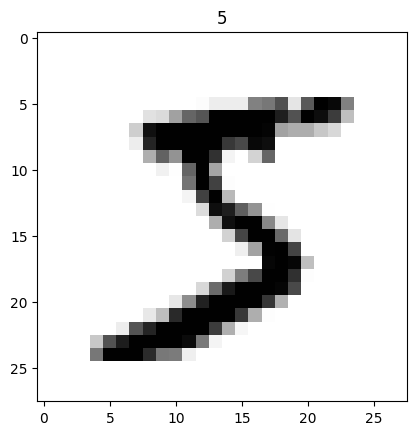

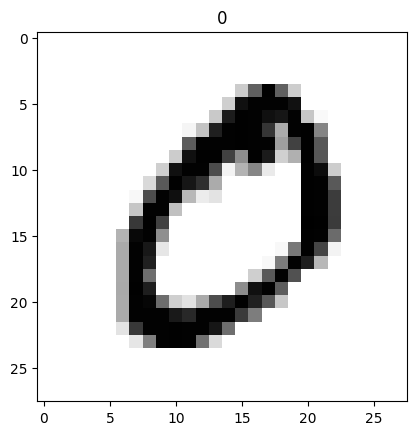

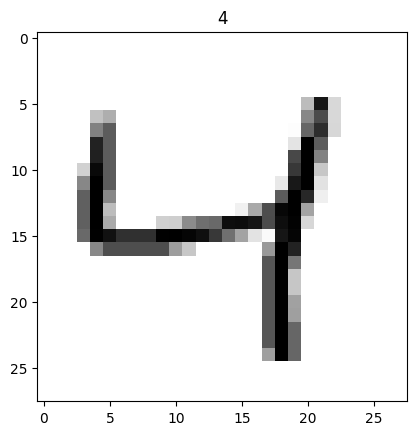

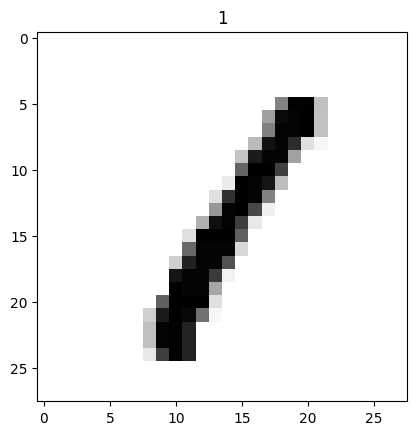

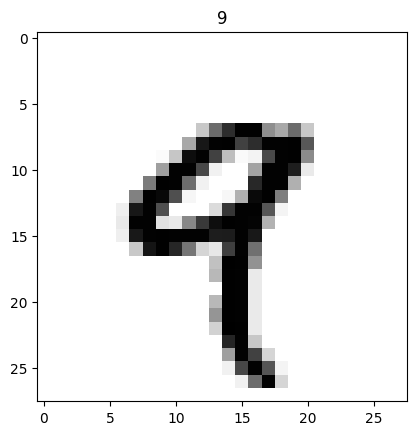

In [9]:
for i in range(5):
    show_input_img(i)

In [10]:
# Pre-Processing the images

In [11]:
# Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
X_train.shape

(60000, 28, 28)

In [12]:
# Dimension expansion to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [13]:
# Convert output classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

Metal device set to: Apple M1 Pro


2023-01-08 15:48:19.738868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-08 15:48:19.739443: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# Model Check Point
model_checkpoint = ModelCheckpoint("./mnist.h5",monitor='val_accuracy',verbose=1, save_best_only=True)
cb =[early_stopping, model_checkpoint]

In [19]:
# Model training
history = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5


2023-01-08 15:48:21.957260: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-08 15:48:22.091271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1313/1313 [==============================] - ETA: 0s - loss: 0.2445 - accuracy: 0.9240

2023-01-08 15:48:34.176042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.97544, saving model to ./mnist.h5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2445 - accuracy: 0.9240 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 2/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9723
Epoch 2: val_accuracy improved from 0.97544 to 0.97894, saving model to ./mnist.h5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0916 - accuracy: 0.9724 - val_loss: 0.0680 - val_accuracy: 0.9789
Epoch 3/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9790
Epoch 3: val_accuracy improved from 0.97894 to 0.98489, saving model to ./mnist.h5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0510 - val_accuracy: 0.9849
Epoch 4/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0555 - accuracy: 0.9831
Epoch 4: val_accuracy did not improve from 0.98489
1313/1

In [20]:
history

In [21]:
model = keras.models.load_model("/Users/pravinanandpawar/Documents/mnist1.h5")

In [22]:
score = model.evaluate(X_test, y_test)

 27/313 [=>............................] - ETA: 1s - loss: 0.0398 - accuracy: 0.9884

2023-01-08 15:49:35.312086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0403 - accuracy: 0.9871


In [23]:
print(" The model accuracy is ", score[1])

 The model accuracy is  0.9871000647544861


In [24]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

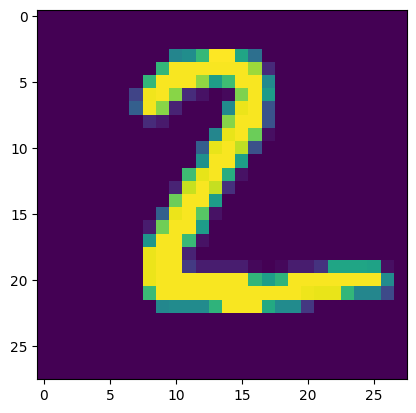

In [25]:
plt.imshow(X_test[1])

In [26]:
np.argmax(model.predict(X_test[1].reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 50ms/step


2023-01-08 15:49:37.254638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2

1/1 [==============================] - 0s 9ms/step


7

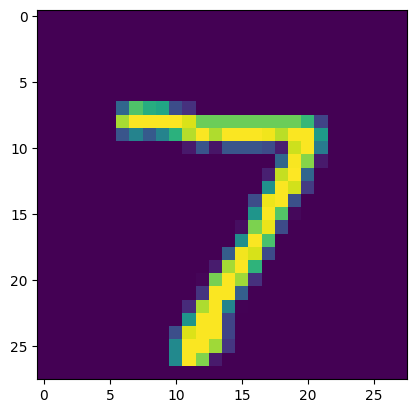

In [27]:
plt.imshow(X_test[0])
np.argmax(model.predict(X_test[0].reshape(1, 28, 28, 1)))